In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#### Data preparation

In [2]:
def load_data(root_dir,image_size=(32,32)):
    X=[]
    Y=[]
    for label in sorted(os.listdir(root_dir)):
        label_path= os.path.join(root_dir,label)
        if not os.path.isdir(label_path):
            continue
        for fname in os.listdir(label_path):
            if fname.lower().endswith(".jpg"):
                img_path= os.path.join(label_path,fname)
                img=Image.open(img_path).convert('L').resize(image_size)
                X.append(np.array(img).flatten())
                Y.append(label)
    return np.array(X), np.array(Y)

In [3]:
image_folder='data'
X,y=load_data(image_folder,image_size=(32,32))

In [4]:
X

array([[170, 171, 176, ..., 112, 115, 116],
       [131, 131, 130, ...,  86,  85,  86],
       [ 38,  58,  70, ..., 129, 129, 126],
       ...,
       [118, 117, 114, ..., 171, 170, 170],
       [ 97,  98, 103, ..., 141, 138, 145],
       [141, 142, 137, ...,  99, 108, 106]],
      shape=(55924, 1024), dtype=uint8)

In [5]:
print(len(np.unique(y)))
print(np.unique(y))

30
['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy' 'Corn_(maize)___Common_rust_'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Raspberry___healthy' 'Soybean___healthy' 'Squash___Powdery_mildew'
 'Strawberry___Leaf_scorch' 'Strawberry___healthy'
 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Spider_mites Two-spotted_spider_mite'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']


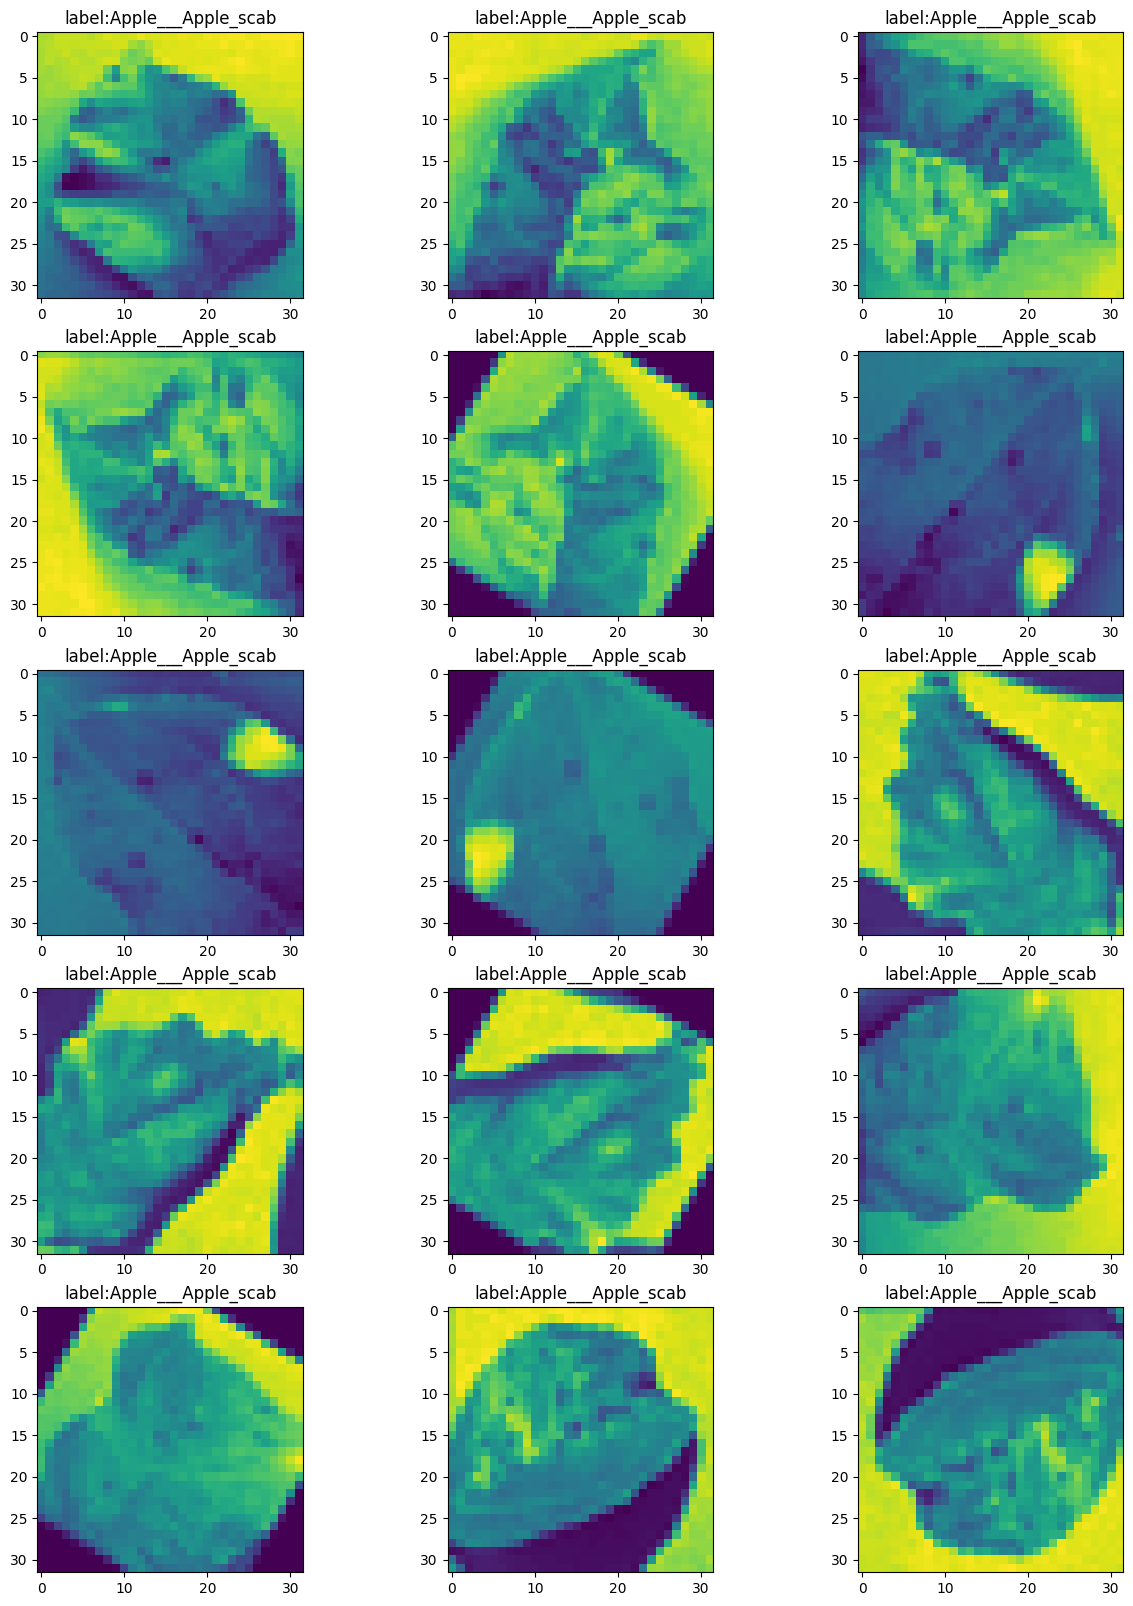

In [6]:
fig, axes=plt.subplots(5,3,figsize=(15,20))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(32,32))
    ax.set_title(f"label:{y[i]}")
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [8]:
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [10]:
y_pred=knn.predict(X_test)

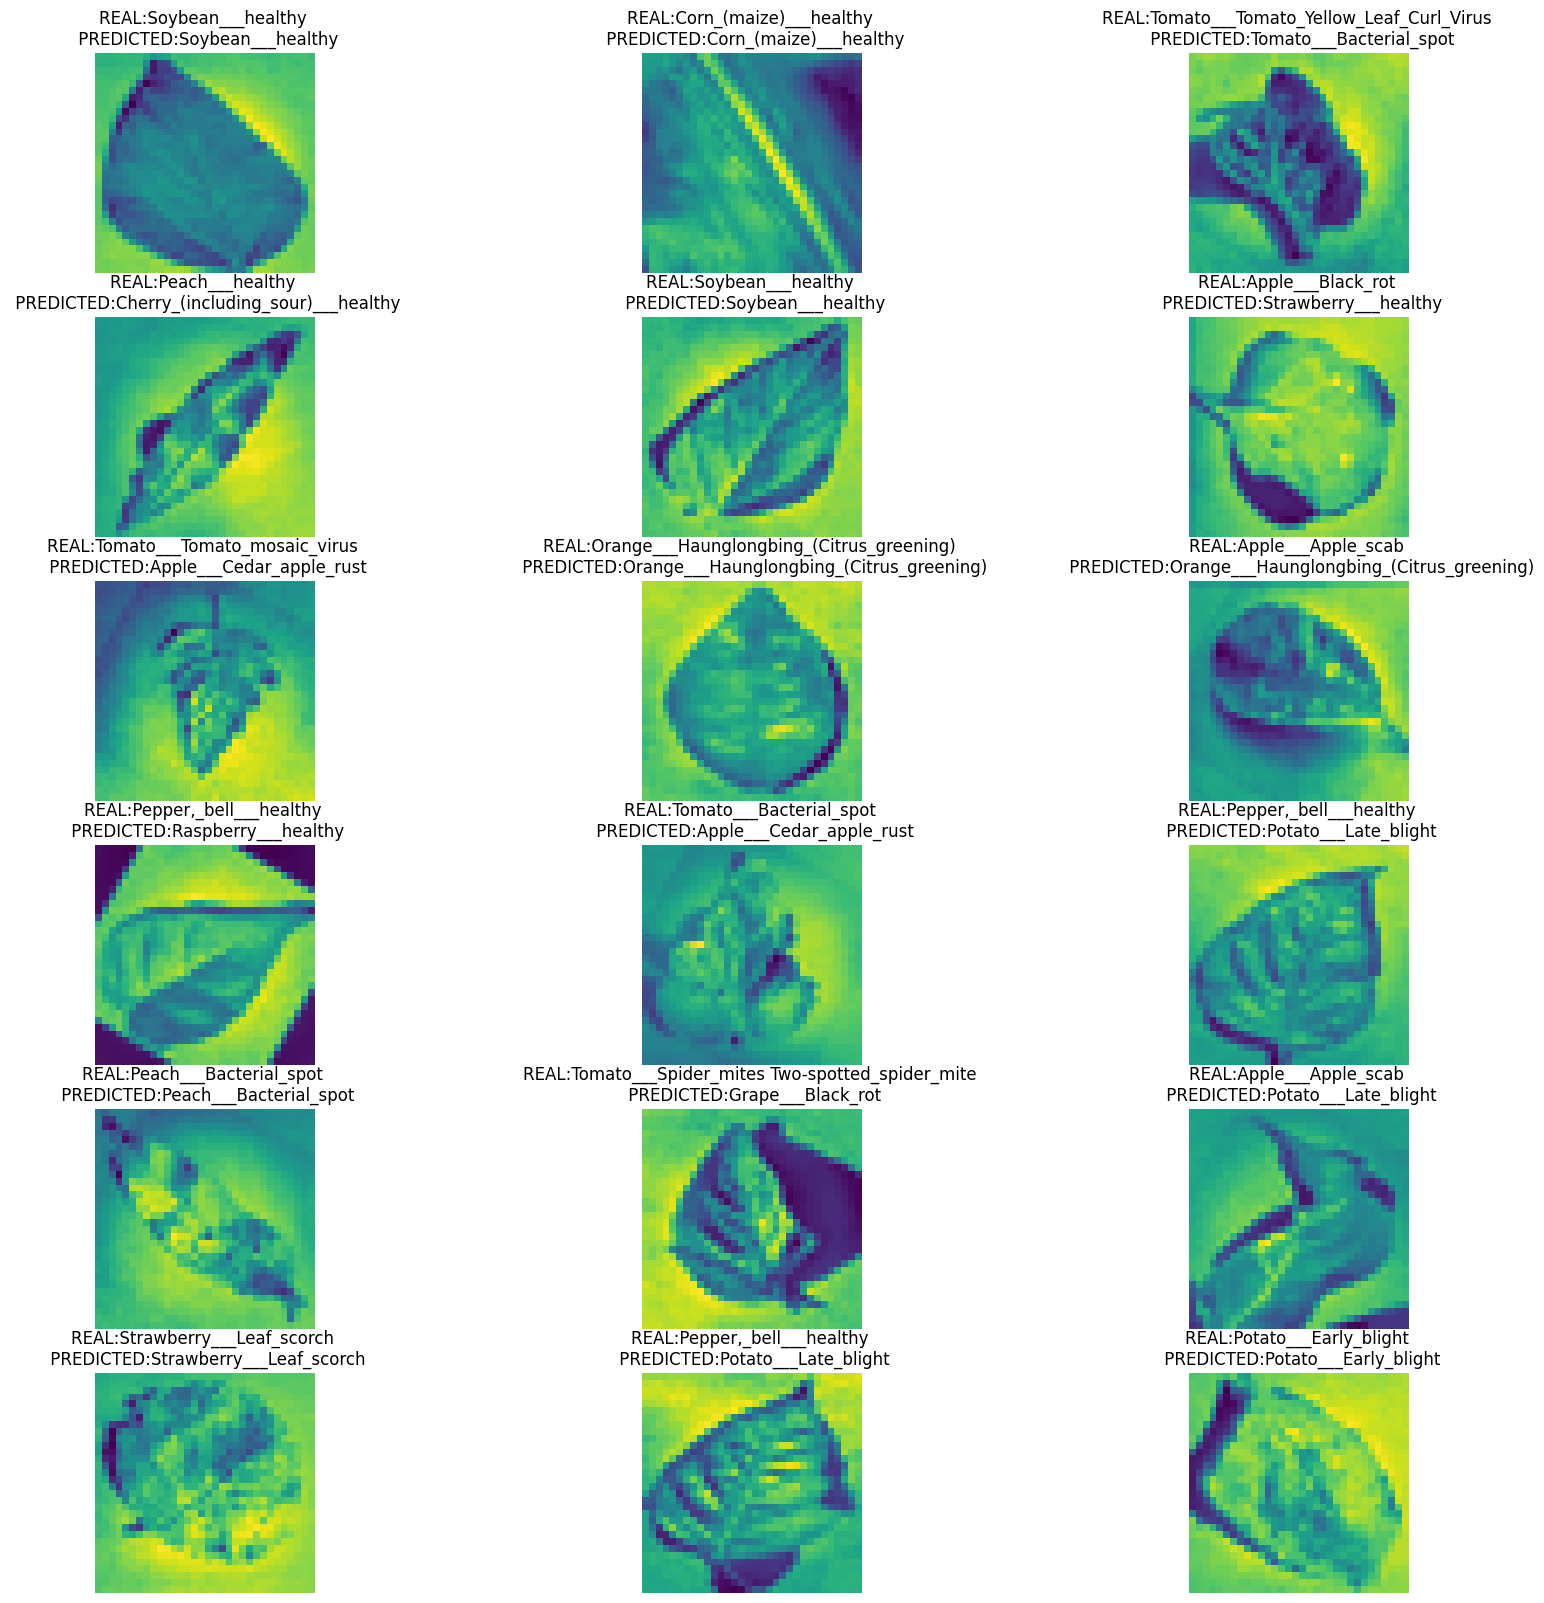

In [11]:
fig, axes=plt.subplots(6,3,figsize=(20,20))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(32,32))
    ax.set_title(f"REAL:{y_test[i]} \n PREDICTED:{y_pred[i]}")
    ax.axis('off')
plt.show()

In [12]:
print(f'Accuracy SCORE:{accuracy_score(y_test,y_pred)*100}%')
print(f'CLASSIFICATION REPORT: \n {classification_report(y_test,y_pred)}')

Accuracy SCORE:42.235136343316945%
CLASSIFICATION REPORT: 
                                                precision    recall  f1-score   support

                           Apple___Apple_scab       0.32      0.31      0.32       406
                            Apple___Black_rot       0.79      0.36      0.50       407
                     Apple___Cedar_apple_rust       0.19      0.62      0.29       354
                              Apple___healthy       0.44      0.38      0.41       437
                          Blueberry___healthy       0.84      0.37      0.51       363
     Cherry_(including_sour)___Powdery_mildew       0.28      0.30      0.29       326
            Cherry_(including_sour)___healthy       0.35      0.86      0.50       374
                  Corn_(maize)___Common_rust_       1.00      0.90      0.95       374
                       Corn_(maize)___healthy       0.71      0.48      0.58       378
                            Grape___Black_rot       0.45      0.64   

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {
    'n_neighbors': [2,3,4,5,7,10,12,15,17,20]
}

In [15]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [2, 3, 4, 5, 7, 10, 12, 15, 17, 20]},
             scoring='accuracy')

In [16]:
best_knn = grid.best_estimator_
print("Best parameters:", grid.best_params_)
y_pred = best_knn.predict(X_test)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred))

Best parameters: {'n_neighbors': 4}
Classification Report for Best Model:
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.27      0.40      0.32       406
                            Apple___Black_rot       0.70      0.49      0.58       407
                     Apple___Cedar_apple_rust       0.19      0.66      0.29       354
                              Apple___healthy       0.37      0.43      0.40       437
                          Blueberry___healthy       0.80      0.48      0.60       363
     Cherry_(including_sour)___Powdery_mildew       0.28      0.32      0.30       326
            Cherry_(including_sour)___healthy       0.38      0.89      0.53       374
                  Corn_(maize)___Common_rust_       1.00      0.93      0.96       374
                       Corn_(maize)___healthy       0.65      0.52      0.57       378
                            Grape___Black_rot       0.4

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
random_forest_model=RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred=random_forest_model.predict(X_test)

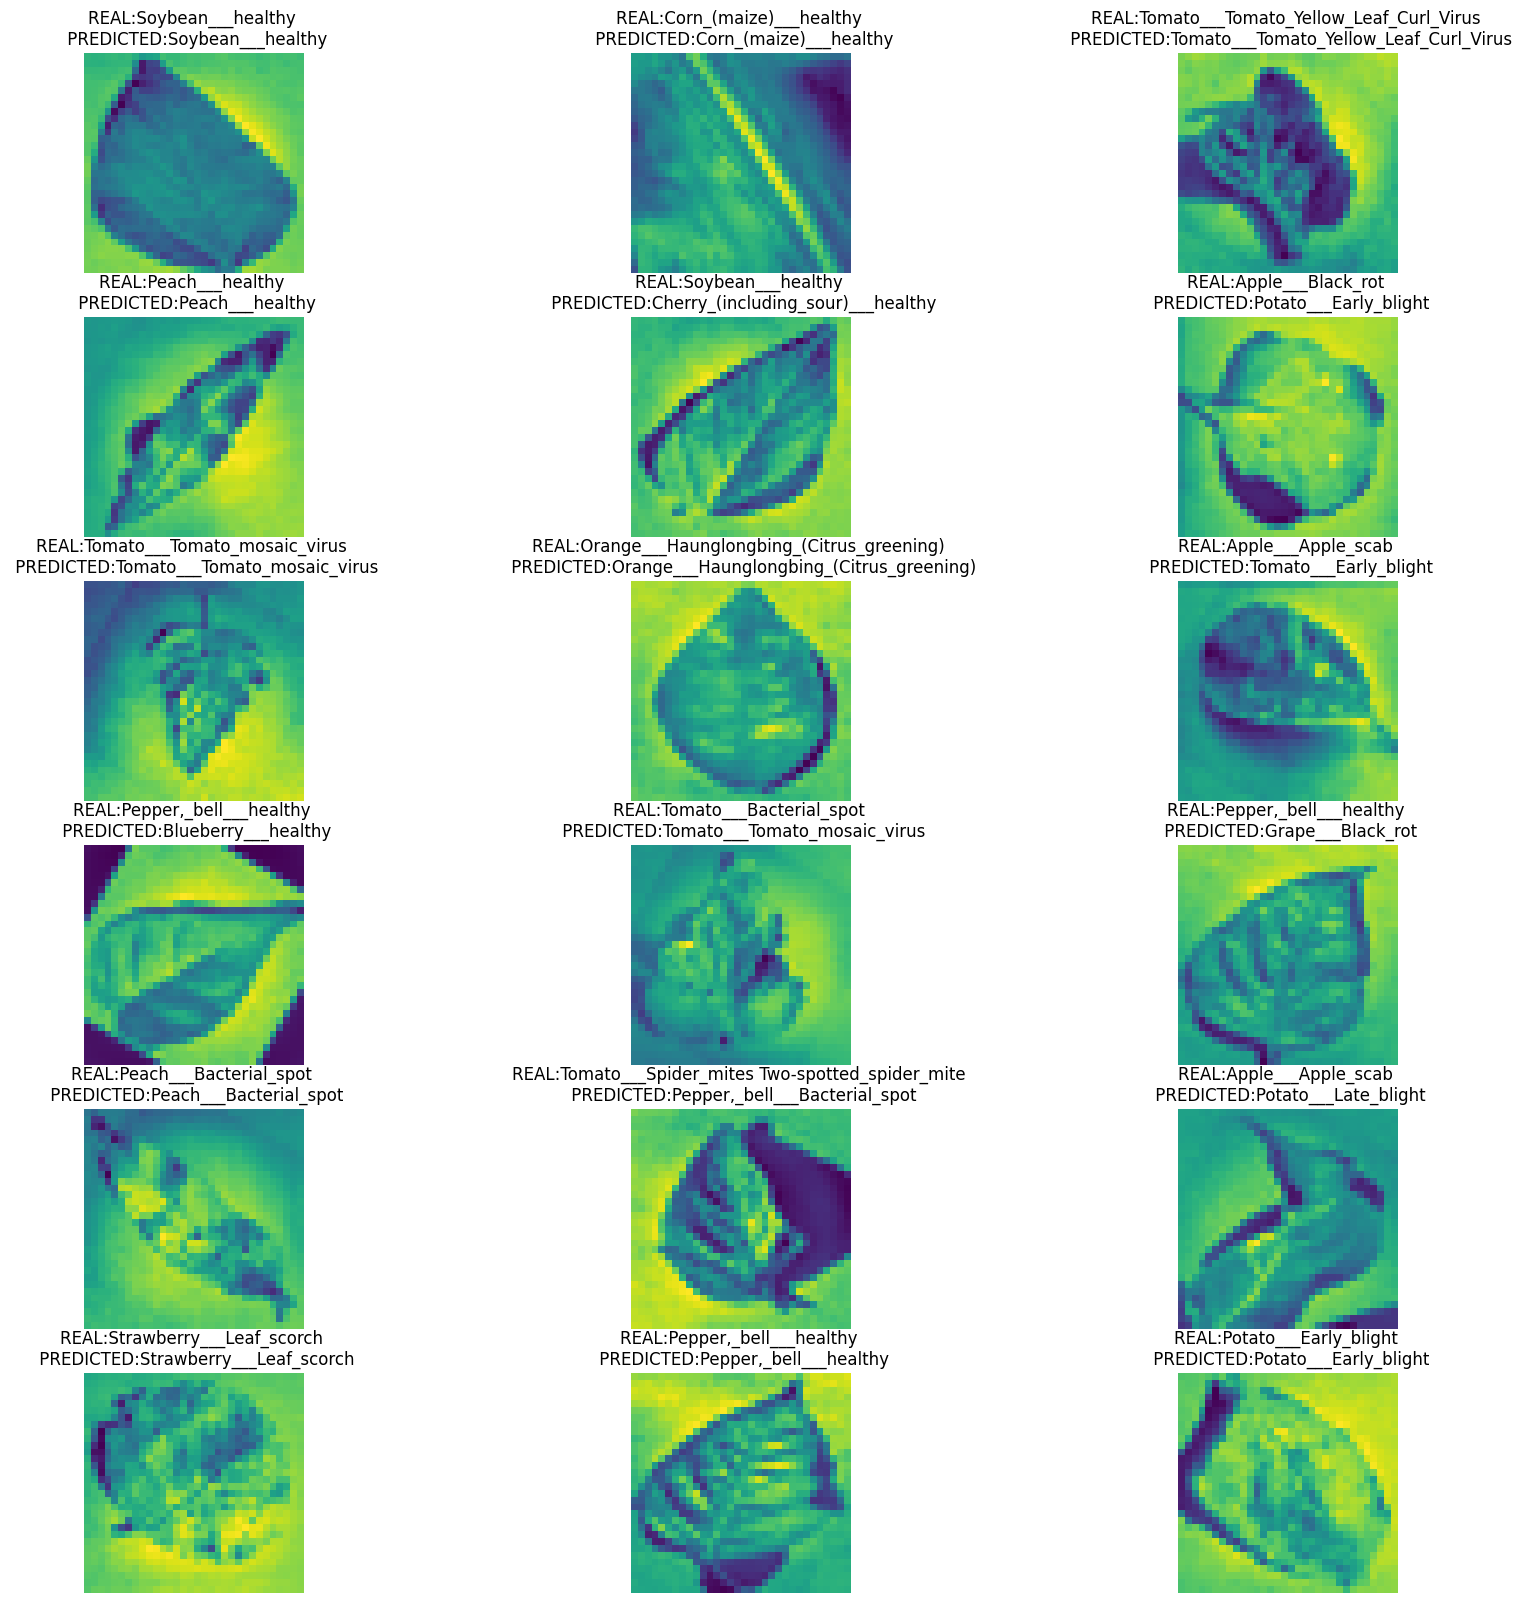

In [20]:
fig, axes=plt.subplots(6,3,figsize=(20,20))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(32,32))
    ax.set_title(f"REAL:{y_test[i]} \n PREDICTED:{y_pred[i]}")
    ax.axis('off')
plt.show()

In [21]:
print(f'Accuracy SCORE:{accuracy_score(y_test,y_pred)*100}%')
print(f'CLASSIFICATION REPORT: \n {classification_report(y_test,y_pred)}')

Accuracy SCORE:61.23379526151095%
CLASSIFICATION REPORT: 
                                                precision    recall  f1-score   support

                           Apple___Apple_scab       0.51      0.46      0.48       406
                            Apple___Black_rot       0.66      0.54      0.59       407
                     Apple___Cedar_apple_rust       0.69      0.51      0.59       354
                              Apple___healthy       0.51      0.45      0.47       437
                          Blueberry___healthy       0.73      0.73      0.73       363
     Cherry_(including_sour)___Powdery_mildew       0.47      0.47      0.47       326
            Cherry_(including_sour)___healthy       0.72      0.85      0.78       374
                  Corn_(maize)___Common_rust_       0.99      0.99      0.99       374
                       Corn_(maize)___healthy       0.70      0.69      0.70       378
                            Grape___Black_rot       0.52      0.58    

In [22]:
param_grid={
    'n_estimators':[100,200,300,400],
    'max_features':['auto','sqrt'],
    'bootstrap':[True,False]
}

In [ ]:
grid_search=GridSearchCV(estimator=random_forest_model,param_grid=param_grid,cv=5,
                         verbose=2, scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END bootstrap=True, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, n_es

In [ ]:
best_rf = grid.best_estimator_
print("Best parameters:", grid.best_params_)
print("max_depth of best model:", best_rf.max_depth)
y_pred = best_rf.predict(X_test)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred))